In [277]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In previous examples, we have seen how regularizations of functions could be utilized to enforce specific characteristics. During the Ridge-regression, the L2-norm of the weight vector was added to the loss function to penalize large coefficient values. However, we could focus on dimensionality reduction instead of constructing a regularization that penalizes large values. The Lasso regression tries to reduce the dimensionality by enforcing a penalization of non-zero weight. In practice, this is accomplished by utilizing the L1 norm instead. 


Consider a sample consisting of N cases, each of which consists of p covariates and a single outcome. Let y i y_{i} be the outcome and ${\displaystyle x_{i}:=(x_{1},x_{2},\ldots ,x_{p})_{i}^{T}}$ be the covariate vector for the i th case. Then the objective of lasso is to solve 

${\displaystyle \min _{\beta _{0},\beta }\left\{\sum _{i=1}^{N}(y_{i}-\beta _{0}-x_{i}^{T}\beta )^{2}\right\}{\text{ subject to }}\sum _{j=1}^{p}|\beta _{j}|\leq t.}$

Here $\beta _{0}$ is the constant coefficient, ${\displaystyle \beta :=(\beta _{1},\beta _{2},\ldots ,\beta _{p})}$ is the coefficient vector, and t t is a prespecified free parameter that determines the degree of regularization. 

etting X X be the covariate matrix, so that ${\displaystyle X_{ij}=(x_{i})_{j}} and x i T {\displaystyle x_{i}^{T}}$ is the i th row of X X, the expression can be written more compactly as

${\displaystyle \min _{\beta _{0},\beta }\left\{\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq t,}$

where ${\displaystyle \|u\|_{p}=\left(\sum _{i=1}^{N}|u_{i}|^{p}\right)^{1/p}}$ is the standard ${\displaystyle \ell ^{p}}$ norm.

Denoting the scalar mean of the data points ${\bar {x}}$ and the mean of the response variables ${\bar {y}}$, the resulting estimate for ${\displaystyle {\hat {\beta }}_{0}={\bar {y}}-{\bar {x}}^{T}\beta }$, so that 

${\displaystyle y_{i}-{\hat {\beta }}_{0}-x_{i}^{T}\beta =y_{i}-({\bar {y}}-{\bar {x}}^{T}\beta )-x_{i}^{T}\beta =(y_{i}-{\bar {y}})-(x_{i}-{\bar {x}})^{T}\beta ,}$

and therefore it is standard to work with variables that have been made zero-mean. Additionally, the covariates are typically standardized ($\left(\sum _{i=1}^{N}x_{i}^{2}=1\right)$ so that the solution does not depend on the measurement scale. 

It can be helpful to rewrite 

${\displaystyle \min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq t.}$

in the so-called Lagrangian form

${\displaystyle \min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \|\beta \|_{1}\right\}}$

where the exact relationship between t and  $\lambda$ is data dependent. 

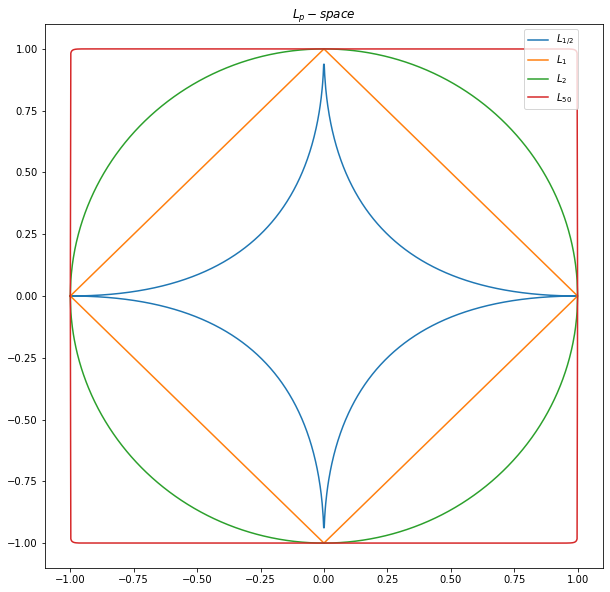

In [278]:

Lp = lambda x,p : (1 - abs(x)**p) ** (1/p)

X = [x for x in np.linspace(-1,1,1000)]
l0 = [Lp(x,0.5) for x in X]
l1 = [Lp(x,1) for x in X]
l2 = [Lp(x,2) for x in X]
l3 = [Lp(x,100) for x in X]

fig, ax = plt.subplots(figsize=(10, 10));

l0 , = ax.plot(X + X[::-1], l0 + [-e for e in l0]);
l0.set_label(r'$L_{1/2}$')

l1, = ax.plot(X + X[::-1], l1 + [-e for e in l1], label=r'L_{1}');
l1.set_label(r'$L_{1}$')

l2, = ax.plot(X + X[::-1], l2 + [-e for e in l2], label=r'L_{2}');
l2.set_label(r'$L_{2}$')

l3, = ax.plot(X + X[::-1], l3 + [-e for e in l3], label=r'L_{50}');
l3.set_label(r'$L_{50}$');

ax.legend(loc='upper left', bbox_to_anchor=(0.85,1))
ax.set_title(r'$L_{p}-space$');
plt.show()

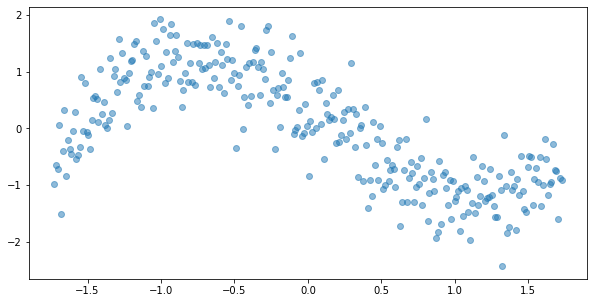

In [279]:
X = np.array([[i] for i in np.linspace(0,11,300)])
X = (X - X.mean()) / X.std()
Y = np.array([1 * (i - 5) ** 3 - 3*(i - 0.5) ** 2+ np.random.normal(i, 20, 1)  for i in np.linspace(0,11,300)]) 
Y = (Y - Y.mean()) / Y.std()

# Creating plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=X, y=Y, alpha=0.5, marker='o');
plt.show();

In [280]:
# Define variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [281]:
k = 4
phi = lambda x : np.power(x, range(k))

[ 0.22757764 -0.80423777 -0.23744334  0.1298558 ]


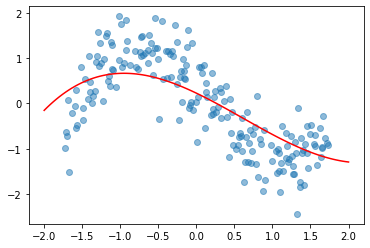

In [282]:
alpha = 0.1

def objective(w):
    return  0.5 * np.sum([(phi(x) @ w - y)**2 for x,y in zip(X_train,y_train)]) / y_train.shape[0] + alpha * np.sum(abs(w[1::]))


start = np.full((1,k),0)
bounds = [(-1.0e10, 1.0e10) for i in range(k)]

solution = optimize.minimize(objective, start, bounds=bounds, method='L-BFGS-B')
w = solution.x

print(w)

# Creating plot
fig, ax = plt.subplots()
ax.scatter(x=X_train[:,0], y=y_train, alpha=0.5, marker='o');
ax.plot(np.linspace(-2,2,100) , [phi(x) @ w for x in np.linspace(-2,2,100)], color='red');
plt.show();

In [276]:
model = linear_model.Lasso(alpha=0.1)
model.fit(phi(X_train), y_train)
print(model.intercept_, model.coef_)

[0.15531341] [ 0.         -0.93603956 -0.16686074  0.23190262]
